In [125]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math
import collections
from scipy.special import comb
from itertools import chain

# Ex. 4.15

In [114]:
def log(x):
    if (x == 0):
        return 1
    else:
        return math.log(x, 2)

In [115]:
def prob_x(p, N, r):
    return p**r*(1-p)**(N - r)

In [116]:
def prob_r(p, N, r):
    return [prob_x(p, N, r) for i in range(0, int(comb(N, r)))]

In [121]:
def probs(N):
    probs_N = [prob_r(0.1, N, r) for r in range (0, N + 1)]
    probs_N = list(chain(*probs_N))
    bits = []
    pr_sort = sorted(probs_N)
    for x in np.arange(0, 1, 0.0001):
        if (x > max(pr_sort)):
            bits.append(log(len(pr_sort))/N)
        elif (x < pr_sort[0]):
            bits.append(log(len(pr_sort))/N)
        else:
            pr_sort[1] = pr_sort[0] + pr_sort[1]
            pr_sort.remove(pr_sort[0])
            bits.append(log(len(pr_sort))/N)
    return bits

Plot for N=1, N=2 and N=3

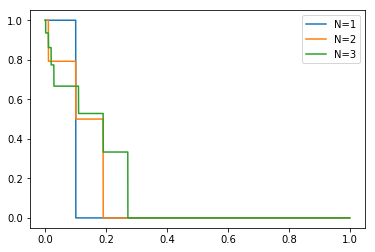

In [129]:
plt.plot(np.arange(0, 1, 0.0001), probs(1))
plt.plot(np.arange(0, 1, 0.0001), probs(2))
plt.plot(np.arange(0, 1, 0.0001),  probs(3))
plt.legend(["N=1", "N=2", "N=3"])